In [ ]:
# ===========================================================
# Convolutional Neural Network for CIFAR-10 Classification
# ===========================================================

# a. Loading and Preprocessing the Image Data
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load train and test data (already pre-saved as CSV)
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

# Normalize pixel values to [0, 1] for better training performance
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the flattened pixels to 32x32x3 image format
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)



print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Number of classes:", train_generator.num_classes)
print("Class indices:", train_generator.class_indices)



In [2]:
# ===========================================================
# b. Defining the Model's Architecture
# ===========================================================

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Flatten + Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

# Model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)             

In [3]:
# ===========================================================
# c. Training the Model
# ===========================================================

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/10


782/782 [==============================] - 30s 34ms/step - loss: 1.4869 - accuracy: 0.4594 - val_loss: 1.2180 - val_accuracy: 0.5630
Epoch 2/10
782/782 [==============================] - 26s 33ms/step - loss: 1.1144 - accuracy: 0.6079 - val_loss: 1.1018 - val_accuracy: 0.6133
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 0.9506 - accuracy: 0.6672 - val_loss: 1.0395 - val_accuracy: 0.6348
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.8434 - accuracy: 0.7059 - val_loss: 0.8946 - val_accuracy: 0.6901
Epoch 5/10
782/782 [==============================] - 22s 28ms/step - loss: 0.7585 - accuracy: 0.7367 - val_loss: 0.8652 - val_accuracy: 0.7018
Epoch 6/10
782/782 [==============================] - 24s 31ms/step - loss: 0.6867 - accuracy: 0.7606 - val_loss: 0.8256 - val_accuracy: 0.7221
Epoch 7/10
782/782 [==============================] - 25s 32ms/step - loss: 0.6242 - accuracy: 0.7798 - val_loss: 0.8517 - val_accura

313/313 - 1s - loss: 0.8721 - accuracy: 0.7239 - 1s/epoch - 4ms/step

Test Accuracy: 0.7239
Test Loss: 0.8721


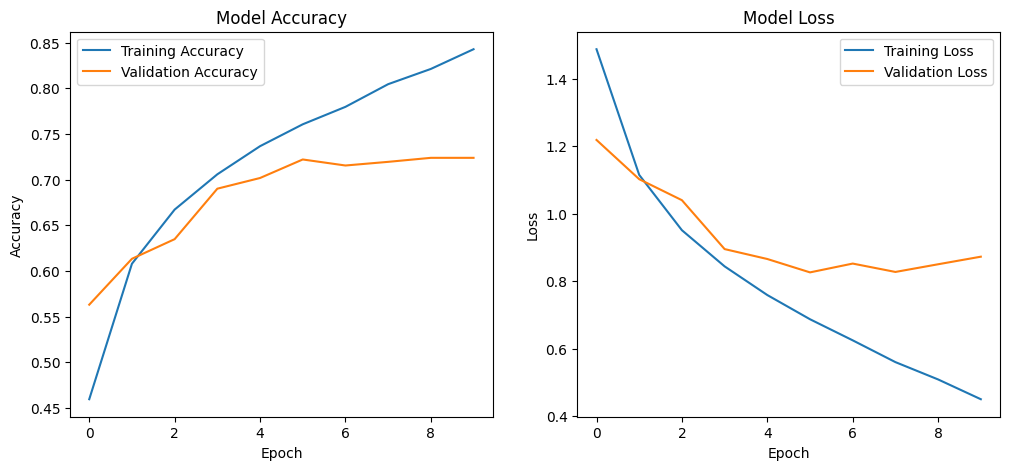

In [5]:
# ===========================================================
# d. Estimating the Model's Performance
# ===========================================================

# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy: {:.4f}".format(test_accuracy))
print("Test Loss: {:.4f}".format(test_loss))

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()